# Домашняя работа №3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [2]:
# следующая строчка подключает сертификат для защищенного соединения
#ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [3]:
df.head(5)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [4]:
df['Freedom'].describe() 

count    155.000000
mean      78.000000
std       44.888751
min        1.000000
25%       39.500000
50%       78.000000
75%      116.500000
max      155.000000
Name: Freedom, dtype: float64

In [5]:
df['Positive affect'].describe()

count    155.000000
mean      78.000000
std       44.888751
min        1.000000
25%       39.500000
50%       78.000000
75%      116.500000
max      155.000000
Name: Positive affect, dtype: float64

In [6]:
df.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

In [7]:
df['Freedom'] = df['Freedom'].fillna(156)
df['Positive affect'] = df['Positive affect'].fillna(156)

Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

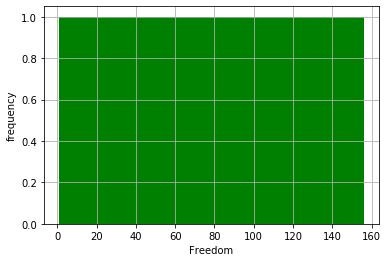

In [8]:
plt.hist(df['Freedom'], 156, facecolor='g')
plt.xlabel('Freedom')
plt.ylabel('frequency')
plt.grid(True)
plt.show()

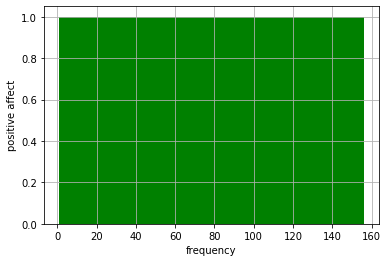

In [9]:
plt.hist(df['Positive affect'], 156, facecolor='g')
plt.xlabel('frequency')
plt.ylabel('positive affect')
plt.grid(True)
plt.show()

In [10]:
#Равномерное распределение

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [11]:
df['Freedom'].describe()

count    156.000000
mean      78.500000
std       45.177428
min        1.000000
25%       39.750000
50%       78.500000
75%      117.250000
max      156.000000
Name: Freedom, dtype: float64

In [12]:
df['Freedom'].median()

78.5

In [13]:
df['Freedom'].var()

2041.0

In [14]:
df['Freedom'].max()-df['Freedom'].min()

155.0

In [15]:
df['Freedom'].mode()

0        1.0
1        2.0
2        3.0
3        4.0
4        5.0
       ...  
151    152.0
152    153.0
153    154.0
154    155.0
155    156.0
Length: 156, dtype: float64

Почему нельзя найти моду?

In [16]:
#Каждое значение встречается только один раз, поэтому же нет выборосов

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

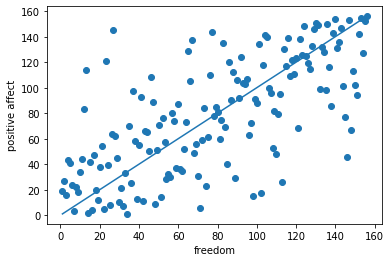

In [17]:
free=df['Freedom']
positive=df['Positive affect']
plt.scatter(free, positive)
plt.xlabel('freedom')
plt.ylabel('positive affect')
plt.plot(free.mode(), positive.mode(), '-')
plt.show()

Коэффициент корреляции Пирсона: 0.6878506740844941


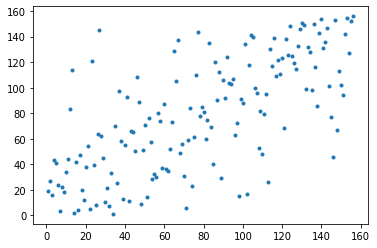

In [18]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(free, positive)
plt.scatter(free, positive, marker='.')
print('Коэффициент корреляции Пирсона:', corr)


In [19]:
#зависимость положительная (обе переменный растут одновременно)  сила средняя (ближе к высокой)

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [20]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

free = min_max_scaler.fit_transform(np.array(free).reshape(-1, 1))

print(min(free))
print(max(free))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

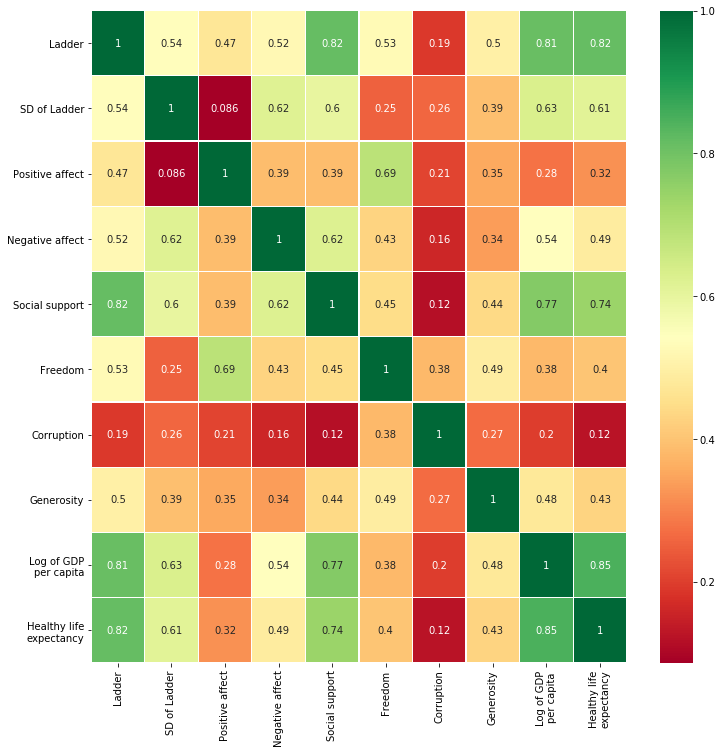

In [21]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

Загрузить таблицу цен на авокадо: 

In [22]:
df=pd.read_csv('avocado.csv')
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

In [23]:
df['AveragePrice'].describe()


count    18249.000000
mean         1.405978
std          0.402677
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: AveragePrice, dtype: float64

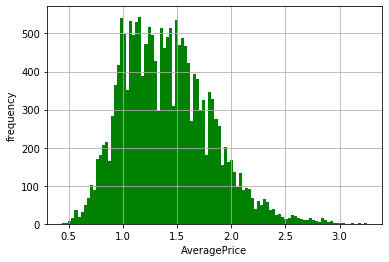

In [24]:
avgp=df['AveragePrice']
plt.hist(avgp, 100, facecolor='g')
plt.xlabel('AveragePrice')
plt.ylabel('frequency')
plt.grid(True)
plt.show()

In [25]:
#смещенное нормальное распределение

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [26]:
c_4046=df['4046']
c_4225=df['4225']
c_4770=df['4770']

In [27]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [28]:
df.corr().loc['AveragePrice', '4046':'4770']

4046   -0.208317
4225   -0.172928
4770   -0.179446
Name: AveragePrice, dtype: float64

In [29]:
#зависимость есть- обратная, очень слабая. показатели растут разнонаправленно, относительно AveragePrice